In [1]:
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
m_i = plt.imread("44153.tif")
p_i = Image.open("44153.tif")

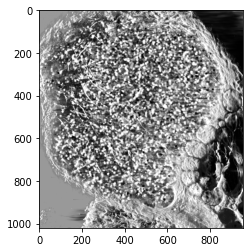

In [3]:
plt.imshow(m_i,cmap="gray")

In [4]:
m_i.shape

(1020, 954)

In [5]:
import numpy as np

In [6]:
imarray = np.array(p_i)

In [7]:
imarray.shape

(1020, 954)

In [8]:
!pip install tifffile

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


In [9]:
import tifffile

In [10]:
file_path = '44153.tif'
images = tifffile.imread(file_path)

In [11]:
images

array([[[153, 153, 153, ..., 124, 124, 124],
        [152, 151, 152, ...,  88,  89,  88],
        [152, 150, 151, ...,  81,  81,  81],
        ...,
        [153, 153, 153, ...,  51,  69, 175],
        [153, 153, 153, ...,  45, 103, 206],
        [153, 153, 153, ...,  73, 130, 199]],

       [[153, 153, 153, ..., 124, 124, 124],
        [152, 151, 152, ...,  88,  89,  88],
        [152, 150, 151, ...,  81,  81,  81],
        ...,
        [153, 153, 153, ...,  51,  69, 175],
        [153, 153, 153, ...,  45, 103, 206],
        [153, 153, 153, ...,  73, 130, 199]],

       [[153, 153, 153, ..., 124, 124, 124],
        [152, 151, 152, ...,  88,  89,  88],
        [152, 150, 151, ...,  81,  81,  81],
        ...,
        [153, 153, 153, ...,  51,  69, 175],
        [153, 153, 153, ...,  45, 103, 206],
        [153, 153, 153, ...,  73, 130, 199]]], dtype=uint8)

In [12]:
images.shape

(3, 1020, 954)

In [13]:
for i, image in enumerate(images):
    print(f"Image {i+1}:")
    print(image)
    print('---')

Image 1:
[[153 153 153 ... 124 124 124]
 [152 151 152 ...  88  89  88]
 [152 150 151 ...  81  81  81]
 ...
 [153 153 153 ...  51  69 175]
 [153 153 153 ...  45 103 206]
 [153 153 153 ...  73 130 199]]
---
Image 2:
[[153 153 153 ... 124 124 124]
 [152 151 152 ...  88  89  88]
 [152 150 151 ...  81  81  81]
 ...
 [153 153 153 ...  51  69 175]
 [153 153 153 ...  45 103 206]
 [153 153 153 ...  73 130 199]]
---
Image 3:
[[153 153 153 ... 124 124 124]
 [152 151 152 ...  88  89  88]
 [152 150 151 ...  81  81  81]
 ...
 [153 153 153 ...  51  69 175]
 [153 153 153 ...  45 103 206]
 [153 153 153 ...  73 130 199]]
---


## to be changed from this part

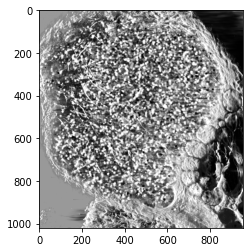

In [14]:
plt.imshow(images[0],cmap="gray")

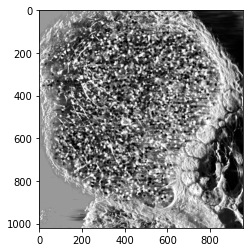

In [15]:
plt.imshow(images[1],cmap="gray")

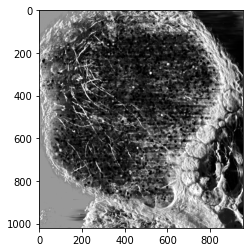

In [16]:
plt.imshow(images[2],cmap="gray")

In [17]:
images[2].shape

(1020, 954)

In [18]:
first_img = images[0]

In [19]:
rgb_image = np.zeros((first_img.shape[0], first_img.shape[1], 3), dtype=np.uint8)

In [20]:
rgb_image[:, :, 0] = first_img #red
rgb_image[:, :, 1] = first_img #green
rgb_image[:, :, 2] = first_img #blue

In [21]:
rgb_image.shape

(1020, 954, 3)

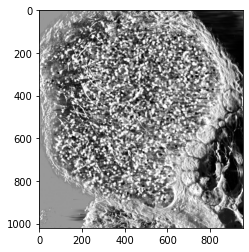

In [22]:
plt.imshow(rgb_image)

Text(0.5, 1.0, 'Blue')

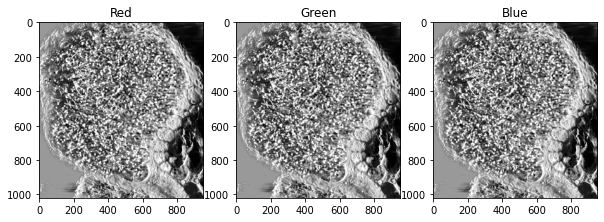

In [23]:
plt.figure(figsize=(10,12))
plt.subplot(1,3,1)
plt.imshow(rgb_image[:,:,0],cmap="gray")
plt.title("Red")

plt.subplot(1,3,2)
plt.imshow(rgb_image[:,:,1],cmap="gray")
plt.title("Green")

plt.subplot(1,3,3)
plt.imshow(rgb_image[:,:,2],cmap="gray")
plt.title("Blue")

# Solve the Issue

Use the same Image and combine all three to form the RGB color 

In [24]:
import scipy.io as sio
import SimpleITK as stk

In [25]:
img = stk.ReadImage("44153.tif")
x = stk.GetArrayFromImage(img)

In [26]:
x.shape

(3, 1020, 954)

In [32]:
rgb_arr = np.expand_dims(x, axis=-1)
rgb_arr.shape

(3, 1020, 954, 1)

In [35]:
rgb_img = np.repeat(rgb_arr, 3, axis=-1)

In [36]:
rgb_img.shape

(3, 1020, 954, 3)

In [38]:
rgb_img = stk.GetImageFromArray(rgb_img)

In [40]:
output_path = "rbg_color.tif"
stk.WriteImage(rgb_img, output_path)

# Using PIL

In [34]:
tif_image = Image.open("44153.tif")

In [35]:
tif_image.tell()

0

In [52]:
tif_image.seek(0)  

In [55]:
tif_image.alpha_composite

<bound method Image.alpha_composite of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=954x1020 at 0x7F5EA5440040>>

In [94]:
rgb_image = tif_image.convert("RGB")

In [103]:
rgb_array = np.array(rgb_image)

In [104]:
rgb_array.shape

(1020, 954, 3)

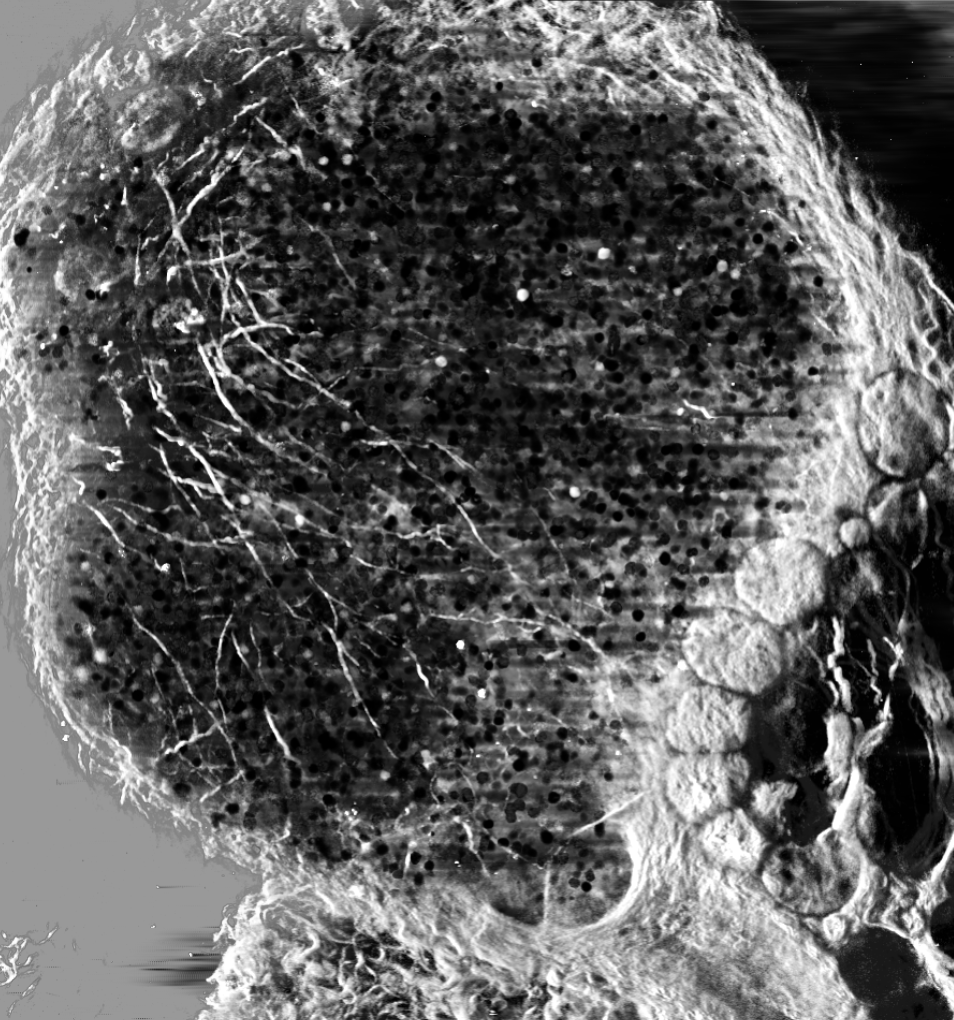

In [105]:
rgb_image

## Assign one image to Red, one to blue and one to green

In [53]:
tif_image.seek(0) 
tif_image.tell()

0

In [36]:
original_image = tif_image.convert('L')

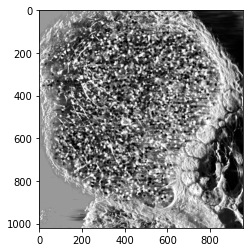

In [55]:
plt.imshow(original_image,cmap="gray")

In [37]:
first_array = np.array(original_image)

In [40]:
red_ch = np.zeros((first_array.shape[0], first_array.shape[1], 3), dtype=np.uint8)
red_ch[:, :, 0] = first_array

In [41]:
red_ch.shape

(1020, 954, 3)

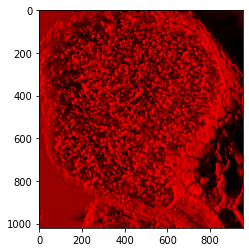

In [57]:
plt.imshow(red_ch)

In [67]:
tif_image.seek(1)

In [68]:
tif_image.tell()

1

In [69]:
original_image = tif_image.convert('L')

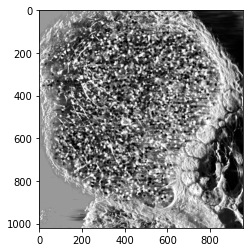

In [70]:
plt.imshow(original_image,cmap="gray")

In [72]:
second_array = np.array(original_image)

In [73]:
green_ch = np.zeros((second_array.shape[0], second_array.shape[1], 3), dtype=np.uint8)
green_ch[:, :, 1] = second_array

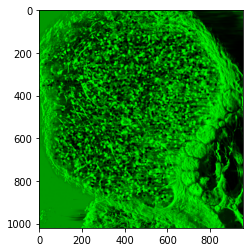

In [74]:
plt.imshow(green_ch)

In [75]:
tif_image.seek(2)
tif_image.tell()

2

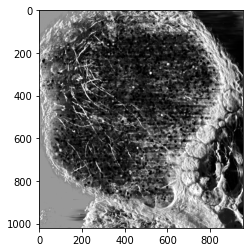

In [77]:
original_image = tif_image.convert('L')
plt.imshow(original_image,cmap="gray")

In [78]:
third_array = np.array(original_image)

In [79]:
blue_ch = np.zeros((third_array.shape[0], third_array.shape[1], 3), dtype=np.uint8)
blue_ch[:, :, 2] = third_array

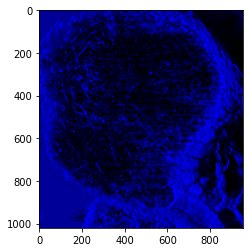

In [80]:
plt.imshow(blue_ch)

In [87]:
red_ch.shape,green_ch.shape,blue_ch.shape

((1020, 954, 3), (1020, 954, 3), (1020, 954, 3))

In [96]:
merged_image = np.concatenate((red_ch, green_ch, blue_ch), axis=0)

In [97]:
merged_image.shape

(3060, 954, 3)

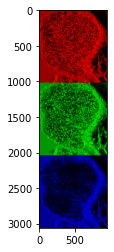

In [98]:
plt.imshow(merged_image)

In [103]:
final_image = np.empty((1020, 954, 3), dtype=np.uint8)
final_image[:, :, 0] = red_ch[:, :, 0]
final_image[:, :, 1] = green_ch[:, :, 1]
final_image[:, :, 2] = blue_ch[:, :, 2]

In [104]:
final_image.shape

(1020, 954, 3)

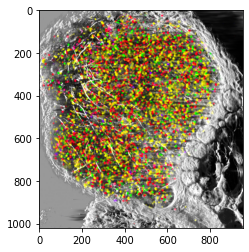

In [105]:
plt.imshow(final_image)

In [106]:
rgb_image = Image.fromarray(final_image)
output_path = "combined_rgb.tif"
rgb_image.save(output_path)